# Compact xforms

xforms can be used to compactly represent a whole workflow.

In [1]:
from pathlib import Path

import nems0.recording as recording
import nems0.uri
import nems0.xforms as xforms

[nems.configs.defaults INFO] Saving log messages to /tmp/nems\NEMS 2020-05-28 115742.log


## Configuration

In [2]:
# get the data and results paths
results_dir = nems.get_setting('NEMS_RESULTS_DIR')
signals_dir = nems.get_setting('NEMS_RECORDINGS_DIR')

In [3]:
# download some demo data
recording.get_demo_recordings(signals_dir)
datafile = Path(signals_dir) / 'TAR010c-18-1.tgz'

## Generate the Modelspec

In [4]:
modelkeywords = 'dlog-wc.18x2.g-fir.2x15-lvl.1-dexp.1'
meta = {'cellids': ['TAR010c-18-1'], 'batch': 271, 'modelname': modelkeywords}

In [5]:
xfspec = [['load_recordings', {'recording_uri_list': [str(datafile)], 'meta':meta}],
          ['split_val_and_average_reps', {'epoch_regex': '^STIM_'}],
          ['init_from_keywords', {'keywordstring': modelkeywords}],
          ['fit_basic_init', {}],
          ['fit_basic', {}],
          ['predict', {}],
          ['add_summary_statistics', {}],
          ['plot_summary', {}]]

## Run the Analysis

[nems.xforms INFO] Evaluating: load_recordings
[nems.xforms INFO] Extracting cellid(s) None
[nems.preprocessing INFO] Adding to epoch_onsets: TRIAL with shift = 0
[nems.xforms INFO] Evaluating: split_val_and_average_reps
[nems.xforms INFO] Evaluating: init_from_keywords
[nems.initializers INFO] kw: dlog
[nems.initializers INFO] kw: wc.18x2.g
[nems.initializers INFO] kw: fir.2x15
[nems.initializers INFO] kw: lvl.1
[nems.initializers INFO] kw: dexp.1
[nems.initializers INFO] Setting modelspec[0] input to stim
[nems.xforms INFO] Evaluating: fit_basic_init
[nems.initializers INFO] prefit_LN parameters: tol=3.16e-06 max_iter=1500
[nems.initializers INFO] target_module: ['levelshift', 'relu'] found at modelspec[3].
[nems.initializers INFO] Mod 3 (nems.modules.levelshift.levelshift) initializing level to resp mean 0.207
[nems.initializers INFO] resp has 1 channels
[nems.initializers INFO] Fit: [0 1 2 3]
[nems.initializers INFO] Freeze: []
[nems.initializers INFO] Exclude: [4.]
[nems.initializ

bin range: 0-500


[nems.xforms INFO] Done (re-)evaluating xforms.


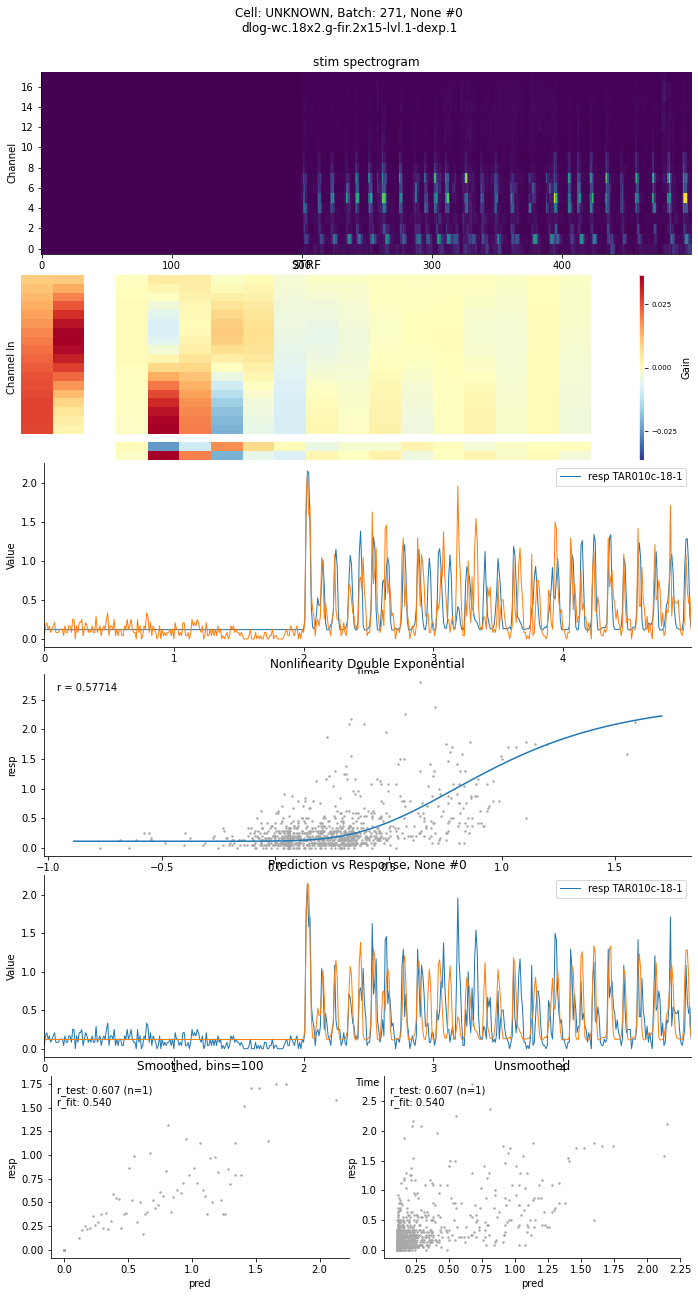

In [6]:
ctx, log_xf = xforms.evaluate(xfspec)